In [5]:
from engine.pipelines.internal.TimeSeries import TimeSeries
from engine.pipelines.internal.Spectrum import Spectrum
import bioread

def get_biopac_test_channel(file_name, wanted_biopac_channel):
    file_data = bioread.read_file("data/{}".format(file_name))
    
    for biopac_channel in file_data.channels:
        if biopac_channel.name == wanted_biopac_channel:
            return biopac_channel
    
    raise Exception("Check channel provided {}".format(wanted_biopac_channel))

file_name = "mouse3.acq"
biopac_channel = "ECoG F"
biopac_test_channel = get_biopac_test_channel(file_name, biopac_channel)
biopac_test_channel

Channel ECoG F: 179998 samples, 1000.0 samples/sec, loaded: True

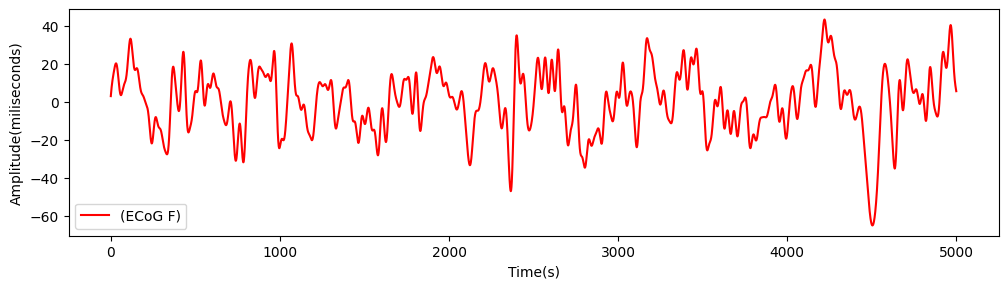

In [6]:
test_time_series = TimeSeries(biopac_channel=biopac_test_channel)
test_time_series.time_data = test_time_series.time_data[0:5000]
test_time_series.time_data_length = len(test_time_series.time_data)
test_time_series.plot()

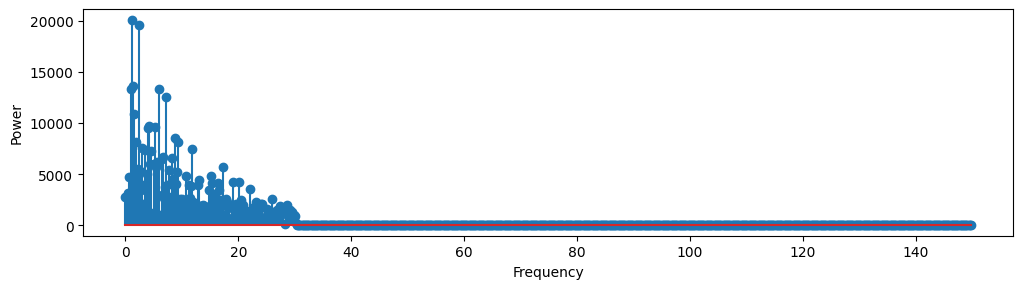

In [7]:
test_spectrum = Spectrum(test_time_series)
test_spectrum.plot(from_index=0, to_index=150)

3867.817432923368

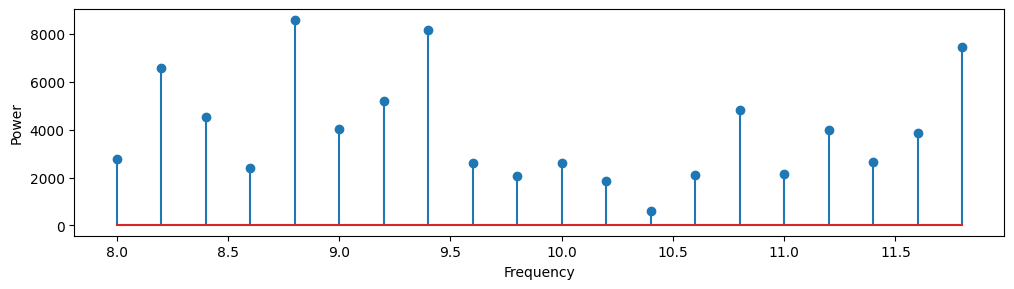

In [8]:
test_spectrum = Spectrum(test_time_series).band_pass_brain_wave("alpha")
test_spectrum.plot(\
    from_index = Spectrum.BRAIN_WAVES_DEFINITIONS["alpha"]["low"],
    to_index = Spectrum.BRAIN_WAVES_DEFINITIONS["alpha"]["high"])
test_spectrum.get_coefficients_mean()